In [1]:
%run Car.ipynb

MODELING SECOND RULE OF COMFORT

In [2]:
#initialize the car instances
car = Car(id = 1, position = 10.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = 5.0)

Scenario1: Driving Uphill

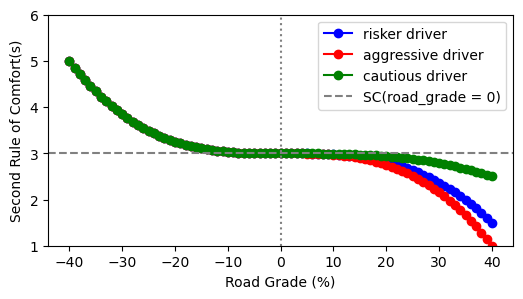

In [3]:
y_uphills = [2.5, 1.5, 1.0]
y_downhill = 5.0
t = 3.0

road_grades = np.arange(-40, 41, 1)

# Use a dictionary to store results for each y_uphill
s_c_results = {}

for y_uphill in y_uphills:
    s_c_values = [
        car.compute_second_rule_comfort_cubic_final(rg, y_uphill, y_downhill, t, 40.0, -40.0)
        for rg in road_grades
    ]
    
    s_c_results[y_uphill] = s_c_values

s_c_values1, s_c_values2, s_c_values3 = [s_c_results[y] for y in y_uphills]
car.plot_sc(road_grades, s_c_values1, s_c_values2, s_c_values3)

Scenario2: Driving Downhill

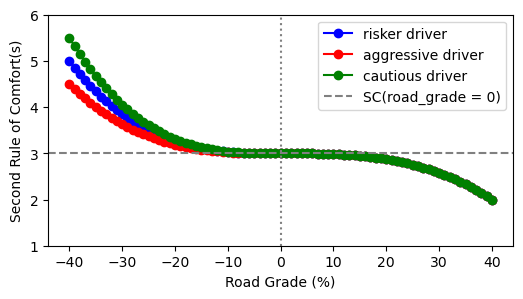

In [4]:
y_downhills = [5.5, 5.0, 4.5]
y_uphill = 2.0
t = 3.0

road_grades = np.arange(-40, 41, 1)

# Use a dictionary to store results for each y_downhill
s_c_results = {}

for y_downhill in y_downhills:
    s_c_values = [
        car.compute_second_rule_comfort_cubic_final(rg, y_uphill, y_downhill, t, 40.0, -40.0)
        for rg in road_grades
    ] 
    s_c_results[y_downhill] = s_c_values

s_c_values1, s_c_values2, s_c_values3 = [s_c_results[y] for y in y_downhills]
car.plot_sc(road_grades, s_c_values1, s_c_values2, s_c_values3)

Scenario3: Driving on Non-Sloped Road

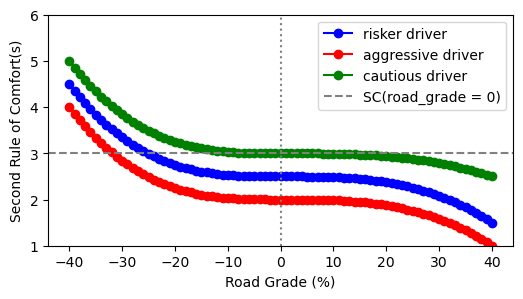

In [5]:
y_uphills = [2.5, 1.5, 1.0]
y_downhills = [5.0, 4.5, 4.0]
sc_flats = [3.0, 2.5, 2.0]

# Use a dictionary to store results for each sc_flat
s_c_results = {}

for i in range(len(sc_flats)):
    s_c_values = [
        car.compute_second_rule_comfort_cubic_final(rg, y_uphills[i], y_downhills[i], sc_flats[i], 40.0, -40.0)
        for rg in road_grades
    ]
    s_c_results[sc_flats[i]] = s_c_values


s_c_values1, s_c_values2, s_c_values3 = [s_c_results[t] for t in sc_flats]
car.plot_sc(road_grades, s_c_values1, s_c_values2, s_c_values3)

MODELING CHANGE OF SECOND RULE OF COMFORT ON CHANGING ROAD GRADE

In [8]:
car1 = Car(id = 1, position = 10.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 1.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = None, a_min = -2.0, a_max = 3.0, a_emer = 5.0)
car2 = Car(id = 2, position = 2.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 5.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = car1, a_min = -2.0, a_max = 3.0, a_emer = 5.0)
car3 = Car(id = 2, position = 2.0, sec_rule = None, velocity1 = 60.0, velocity2 = 20.0, delta_t = 10.0, acc1 = 0.0, d_min = 0.001, max_speed = 45.0, front_car = car2, a_min = -2.0, a_max = 3.0, a_emer = 5.0)

In [10]:
# Initialize previous value for computing change
previous_s_c1 = None
previous_s_c2 = None
previous_s_c3 = None

# car1 [y_uphill, y_downhill, t]
car1_sc = [2.5, 5.0, 3.0]
car2_sc = [1.5, 4.5, 2.5]
car3_sc = [1.0, 4.0, 2.0]

# Print table header
print(f"{'road_grade':>12} | {'sc_cautious driver':>16} | {'change':>10} | {'sc_risker driver':>16} | {'change':>10} | {'sc_aggressive driver':>16} | {'change':>10}")
print("-" * 130)

# Iterate through road grades from -40% to 40%
for rg in range(-40, 41):
    second_rule_comfort1 = car1.compute_second_rule_comfort_cubic_final(rg, *car1_sc)
    second_rule_comfort2 = car2.compute_second_rule_comfort_cubic_final(rg, *car2_sc)
    second_rule_comfort3 = car3.compute_second_rule_comfort_cubic_final(rg, *car3_sc)

    # Compute the change in `s_c` from the previous row
    change_in_s_c1 = second_rule_comfort1 - previous_s_c1 if previous_s_c1 is not None else "-"
    change_in_s_c2 = second_rule_comfort2 - previous_s_c2 if previous_s_c2 is not None else "-"
    change_in_s_c3 = second_rule_comfort3 - previous_s_c3 if previous_s_c3 is not None else "-"

    # Print the results
    print(f"{rg:12} | {second_rule_comfort1:16.10f} | {change_in_s_c1 if isinstance(change_in_s_c1, str) else round(change_in_s_c1, 10):>10} | {second_rule_comfort2:16.10f} | {change_in_s_c2 if isinstance(change_in_s_c2, str) else round(change_in_s_c2, 10):>10} | {second_rule_comfort3:16.10f} | {change_in_s_c3 if isinstance(change_in_s_c3, str) else round(change_in_s_c3, 10):>10}")

    # Update previous values
    previous_s_c1 = second_rule_comfort1
    previous_s_c2 = second_rule_comfort2
    previous_s_c3 = second_rule_comfort3


  road_grade | sc_cautious driver |     change | sc_risker driver |     change | sc_aggressive driver |     change
----------------------------------------------------------------------------------------------------------------------------------
         -40 |     5.0000000000 |          - |     4.5000000000 |          - |     4.0000000000 |          -
         -39 |     4.8537187500 | -0.14628125 |     4.3537187500 | -0.14628125 |     3.8537187500 | -0.14628125
         -38 |     4.7147500000 | -0.13896875 |     4.2147500000 | -0.13896875 |     3.7147500000 | -0.13896875
         -37 |     4.5829062500 | -0.13184375 |     4.0829062500 | -0.13184375 |     3.5829062500 | -0.13184375
         -36 |     4.4580000000 | -0.12490625 |     3.9580000000 | -0.12490625 |     3.4580000000 | -0.12490625
         -35 |     4.3398437500 | -0.11815625 |     3.8398437500 | -0.11815625 |     3.3398437500 | -0.11815625
         -34 |     4.2282500000 | -0.11159375 |     3.7282500000 | -0.11159375 |     

MODELING CHANGE OF ACCELERATION ON CHANGING SECOND RULE OF COMFORT